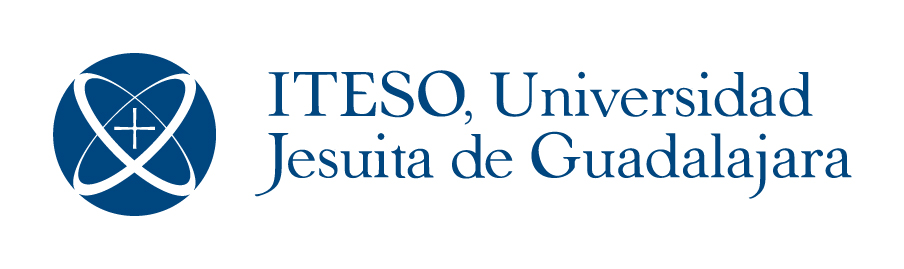

# Modelo epidemiológico por medio de un sistema de ecuaciones diferenciales

**Integrante 1:**

Matias Medrano Ascencio

745136

matias.medrano@iteso.mx

Daniela Serrano Barba

**Integrante 2**

745449

daniela.serrano@iteso.mx

**Integrante 3**

María Fernanda Tirado Zamudio

744529

maria.tirado@iteso.mx

Lunes 27 de noviembre del 2023

## Objetivos

### Objetivo general

Modelar y resolver un sistema de ecuaciones diferenciales que definan el modelo epidemiológico de Kermack-McKendrick.

### Objetivos específicos

- Delimitar el sistema de ecuaciones diferenciales a utilizar, basado en el modelo general de Kermack-McKendrick.
- Definir los parámetros de las ecuaciones según datos comparables a pandemias pasadas, como la de COVID-19. 
- Resolver utilizando la librerias de Python de solve_ivp.
- Simular los resultados obtenidos con condiciones iniciales y compararlos entre sí.
- Representar visualmente los datos obtenidos.

## Modelo que representa el problema

El modelo Kermack-McKendrick se formula como un sistema de ecuaciones diferenciales que modela el tamaño de una población durante una epidemia. El sistema es el siguiente:

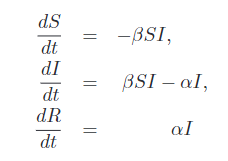

Se denota:
- *S* como el porcentaje de la subpoblación susceptible.
- *I* como el porcentaje de la subpoblación infectada.
- *R* como el porcentaje de la subpoblación no susceptible (ya sea que sean inmunes, estén muertes o en cuarentena).

La derivada de la suma de *S*, *I*, y *R* debe ser 0, es decir, la suma de *S*, *I* y *R* debe ser la constante *N* de la población inicial (1).

La fuerza de infección es definida como la probabilidad por unidad de tiempo en la que un susceptible se infecta. Se asume que la fuerza de infección es proporcional a *I*. La constante de proporcionalidad es $ \beta $.

Se asume que un individuo infectado se vuelve inmediatamente contagioso. Es decir, tras la infección,  un individuo *S* se vuelve automáticamente un individuo *I*.

Se asume que los infectados tienen una probabilidad constante por unidad de tiempo $ \alpha $ para volverse parte de la población no susceptible. Dicho diferente, el periodo de infección tiene una distribución exponencial con el parámetro $ \alpha $, es decir, la probabilidad de todavía ser contagioso *x* unidades de tiempo después de la infección es de $ e^{-\alpha x} $.

## Simulaciones

### Caso 1

Se comienza asignando datos a los parámetros y condiciones iniciales $ \beta $, $ \alpha $, $ S_0 $, $I_0 $ y $ R_0 $.

- $ \beta = 0.05 $
- $ \alpha = 0.15 $ 
- $ S_0 = 0.99 $
- $ I_0 = 0.01 $
- $ R_0 = 0 $

Igualmente definimos un intervalo de tiempo para simular, por ejemplo de 0 a 100 unidades de tiempo (días en este caso).

Definimos nuestra función del modelo de Kermac-McKendrick, la cual recibe un vector que incluye *S*, *I* y *R*, el intervalo de tiempo y los parámetros $ \beta $ y $ \alpha $.

In [3]:
def f(t, M, B, a):
    S = M[0]
    I = M[1]
    R = M[2]
    dS = - B*S*I
    dI = B*S*I - a*I
    dR = a*I
    return [dS, dI, dR]

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp

B = 0.05
a = 0.15
S0 = 0.99
I0 = 0.01
R0 = 0

sim = solve_ivp(f, [0,100], [S0, I0, R0], args = (B, a,), max_step=0.01)

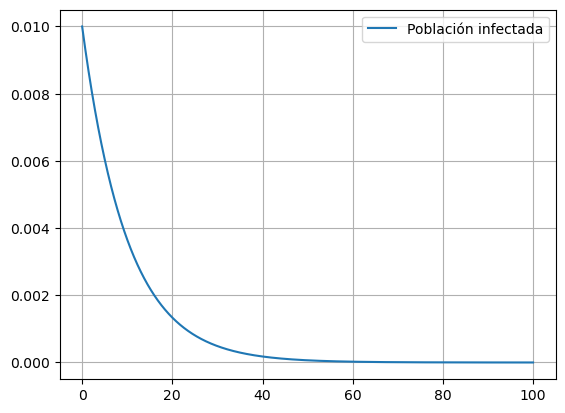

In [48]:
plt.figure()
plt.plot(sim.t, sim.y[1,:], label = "Población infectada")
plt.grid()
plt.legend()

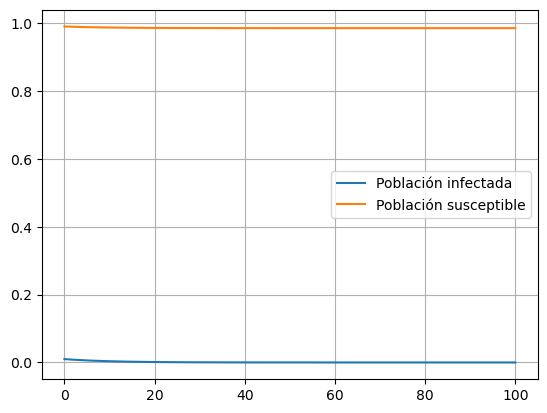

In [49]:
plt.figure()
plt.plot(sim.t, sim.y[1,:], label = "Población infectada")
plt.plot(sim.t, sim.y[0,:], label = "Población susceptible")
plt.grid()
plt.legend()

En este caso, iniciamos con el 1% de la población infectada, una constante de proporcionalidad de 0.05 y una probabilidad de que un infectado se vuelva parte de la población no susceptible de 0.15. La población infectada se reduce continuamente, es decir, no se alcanza un punto más alto de la condición inicial.

### Caso 2

En este caso ajustamos $ \beta $ y $ \alpha $, y mantenemos los porcentajes de las poblaciones iniciales. Igualmente, ajustaremos el tiempo para simular 200 unidades de tiempo.

In [23]:
B = 0.1
a = 0.05
S0 = 0.99
I0 = 0.01
R0 = 0

sim2 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

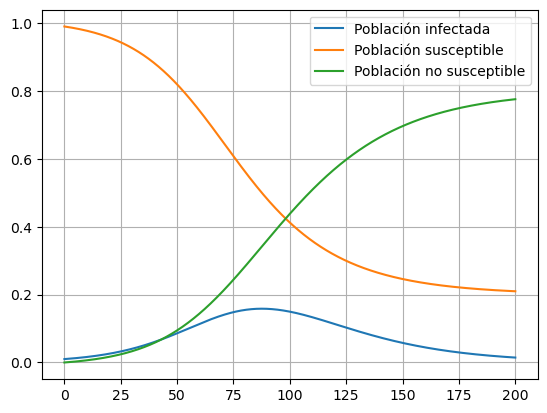

In [24]:
plt.figure()
plt.plot(sim2.t, sim2.y[1,:], label = "Población infectada")
plt.plot(sim2.t, sim2.y[0,:], label = "Población susceptible")
plt.plot(sim2.t, sim2.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

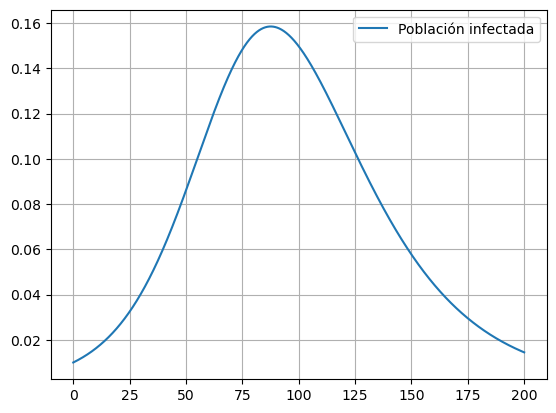

In [25]:
plt.figure()
plt.plot(sim2.t, sim2.y[1,:], label = "Población infectada")
plt.grid()
plt.legend()

En este caso observamos como la población infectada aumentada y logra un punto máximo entre los 75 y 100 días. La población susceptible se va reduciendo acordemente.

### Caso 3

Se vuelve a ajustar los parámetros de manera que $ \beta = 0.3 $ y $ \alpha = 0.05 $.

In [26]:
B = 0.3
a = 0.05
S0 = 0.99
I0 = 0.01
R0 = 0

sim3 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

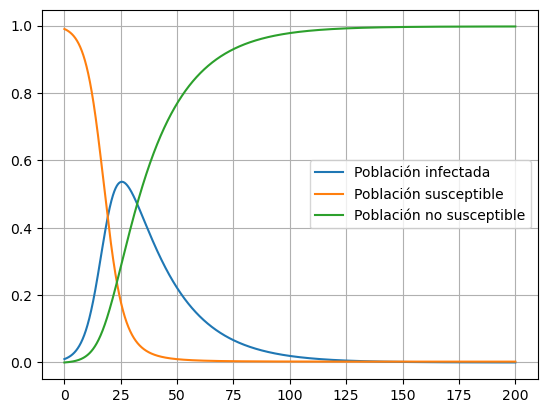

In [27]:
plt.figure()
plt.plot(sim3.t, sim3.y[1,:], label = "Población infectada")
plt.plot(sim3.t, sim3.y[0,:], label = "Población susceptible")
plt.plot(sim3.t, sim3.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

Se observa como la población infectada aumenta más rápidamente que en los casos anteriores, logrando su punto máximo alrededor de los 25 días con más del 50% de la población infectada. 

### Caso 4

Se repetirá la simulación con $ \beta = 0.2 $ y $ \alpha = 0.2 $.

In [28]:
B = 0.2
a = 0.2
S0 = 0.99
I0 = 0.01
R0 = 0

sim4 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

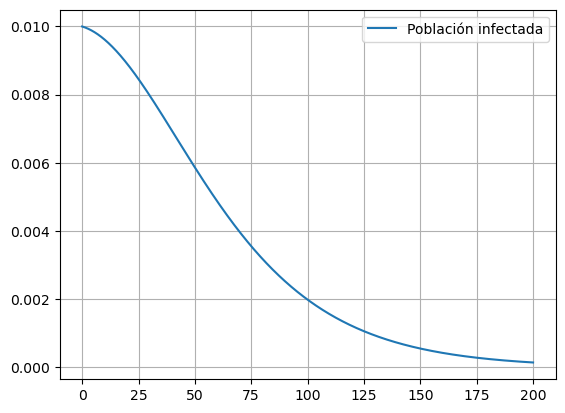

In [31]:
plt.figure()
plt.plot(sim4.t, sim4.y[1,:], label = "Población infectada")
plt.grid()
plt.legend()

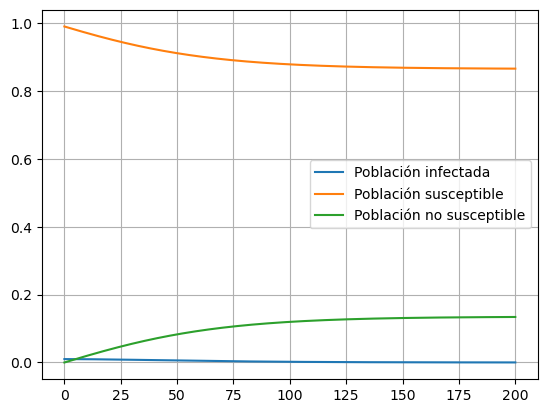

In [32]:
plt.figure()
plt.plot(sim4.t, sim4.y[1,:], label = "Población infectada")
plt.plot(sim4.t, sim4.y[0,:], label = "Población susceptible")
plt.plot(sim4.t, sim4.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

Se observa como la población infectada se reduce continuamente hasta tender a 0, mientras que la población susceptible se reduce lentamente acordemente.

### Caso 5

Se continúa simulando un caso epidemiológico con $ \beta = 0.5 $ y $ \alpha = 0.05 $.

In [33]:
B = 0.5
a = 0.05
S0 = 0.99
I0 = 0.01
R0 = 0

sim5 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

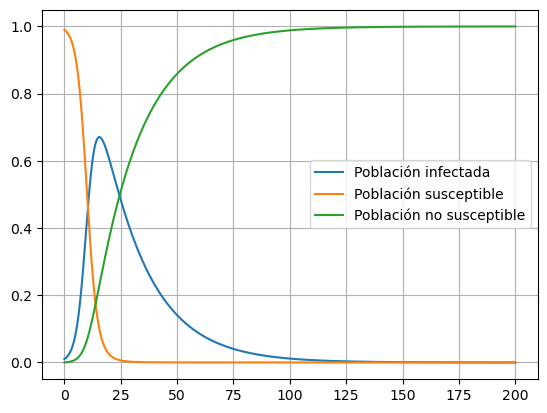

In [34]:
plt.figure()
plt.plot(sim5.t, sim5.y[1,:], label = "Población infectada")
plt.plot(sim5.t, sim5.y[0,:], label = "Población susceptible")
plt.plot(sim5.t, sim5.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

Se observa un aumento más drástico de la población infectada, alcanzando un punto máximo de casi el 70% de la población infectada alrededor de los 20 días del inicio. Posteriormente se reduce la población infectada a medida que aumenta la población no susceptible.

### Caso 6 (COVID-19)

Las condiciones del mundo real son difíciles de representar por medio del modelo de Kerman-McKendrick, ya que enfermedades reales como el COVID-19 cuentan con un comportamiento más complejo y no siguen ciertas reglas del modelo. Sin embargo, es posible asemejar las condiciones con ciertos parámetros.

Se definen los valores $ \beta = 0.3 $, $ \alpha = 0.1 $, $ S_0 = 0.99 $, $ I_0 = 0.01 $ y $ R_0 = 0 $.

In [43]:
B = 0.3
a = 0.1
S0 = 0.99
I0 = 0.01
R0 = 0

sim6 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

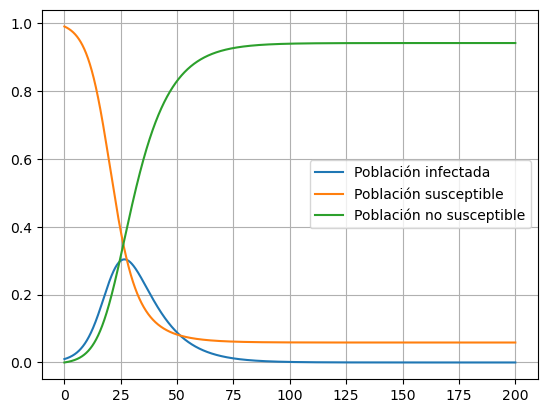

In [44]:
plt.figure()
plt.plot(sim6.t, sim6.y[1,:], label = "Población infectada")
plt.plot(sim6.t, sim6.y[0,:], label = "Población susceptible")
plt.plot(sim6.t, sim6.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

### Caso 7 (Peste Negra)

Existe el mismo problema que con el caso anterior acerca de la dificultad de simular epidemias reales debido a las limitaciones del modelo, y en este caso existe también la falta de información histórica para poder modelar la Peste Negra, pero se puede aproximar con ciertos parámetros ilustrativos.

Se definen los valores $ \beta = 0.05 $, $ \alpha = 0.02 $, $ S_0 = 0.95 $, $ I_0 = 0.05 $ y $ R_0 = 0 $.

In [45]:
B = 0.05
a = 0.02
S0 = 0.95
I0 = 0.05
R0 = 0

sim7 = solve_ivp(f, [0,200], [S0, I0, R0], args = (B, a,), max_step = 0.01)

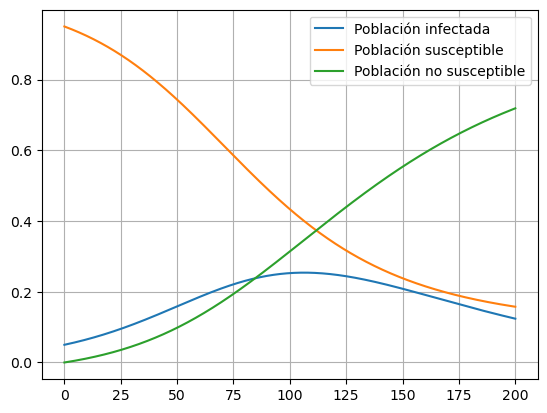

In [46]:
plt.figure()
plt.plot(sim7.t, sim7.y[1,:], label = "Población infectada")
plt.plot(sim7.t, sim7.y[0,:], label = "Población susceptible")
plt.plot(sim7.t, sim7.y[2,:], label = "Población no susceptible")
plt.grid()
plt.legend()

En esta simulación se observa como la duración de la epidemia es más prolongada, alcanzando su punto máximo alrededor de los 100 días.

## Conclusiones

El modelo de Kermack-McKendrick, también conocido como el modelo SRI, es una herramienta sencilla que permite aproximar el movimiento y comportamiento de epidemias según ciertos parámetros de fuerza de contagio y probabilidad de recuperación, al igual que utilizando condiciones iniciales acerca de las poblaciones infectadas y susceptibles originales. Al cumplir con los objetivos planteados, se logró entender la diferencia de resultados al ser alterados ciertos parámetros. Es decir, entre más grande sea la fuerza de infección $ \beta $ (proporción de contagio) en contra de la probabilidad de recuperación $ \alpha $ (proporción en que la población infectada pasa a ser parte de la población no susceptible), más drástica será la propagación y más pronto llegará el punto máximo. El parámetro $ \alpha $ igualmente define la extensión de la infección ya que es la que define que porcentaje de los infectados se "cura". 

Se observa de igual manera que en la mayoría de los casos se comenzó con una población infectada inicial del 1%, lo cual permite facilitar la simulación y comprender su comportamiento, pero para casos reales se debe tomar en cuenta que el marco de referencia comienza con un porcentaje contagiado menor. Existen otros dos detalles que complican la aplicación del modelo SRI más allá de fines ilustrativos. 

El primero es el funcionamiento del modelo, ya que se divide a la población en tres subpoblaciones, los infectados, los susceptibles y los no susceptibles (incluye los muertos, inmunes y personas en cuarentena). Esto significa que una persona tras infectarse (lo cual ocurre instantáneamente en el modelo), pasa por un periodo de recuperación donde se le considera infectado (o contagioso), para finalmente pertenecer al grupo no susceptible, de donde no se mueve un individuo. Esto significa que alguien que se haya recuperado no se puede volver a contagiar según el modelo, lo cual no es realista y limita el alcance y otros puntos máximos en la simulación.

Finalmente, existe el detalle acerca de la dificultad de obtener parámetros durante una epidemia real. Las enfermedades se comportan de manera más compleja y cambian sus características, por lo que es difícil asignarles un dato numérico, especialmente durante el curso de la epidemia, ya que requieren de investigación científica. Debido a ello, a pesar de las limitaciones del modelo en contra de las circunstancias del mundo real, permanece la utilidad del modelo Kermack-McKendrick para la creación de modelos epidemiológicos.

## Referencias

- Abelló, I. A., Guiovart, R. & Morales, W. (2021). *El modelo SIR básico y políticas antiepidémicas de salud pública para la COVID-19 en Cuba*. Scielo. https://scielosp.org/article/rcsp/2020.v46suppl1/e2597/es/
- Diekmann, O., Heesterbeek, H., Britton, T. (2013). *Mathematical Tools for Understanding Infectious Disease Dynamics*. Princeton Series in Theoretical and Computational Biology.
- Sánchez, I. & Vite, R. (2022). *La modelación del covid-19 en México a partir del modelo SIR*. Política y cultura. https://polcul.xoc.uam.mx/index.php/polcul/article/view/1490